# 定数項を含む単純回帰モデル
真のデータ発生過程が次式で与えられていると仮定する．
$$
y_i = \alpha_0 + \beta_0x_i + u_i,~~~~ i = 1,\ldots,n
$$
ここで定数項を含む単回帰モデルを考える．
$$
y_i = \alpha + \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
ただし，誤差項 $u$ について，次の仮定を課す．
$$
\begin{align*}
&\text{E}(u_i) = 0~~\forall i, \\
&\text{E}(u_i^2) = \sigma_u^2~~\forall i, \\
&\text{E}(u_iu_j) = 0~~(i \neq j), \\
&u_i\overset{i.i.d}{\sim} N(0, \sigma_u^2)~~\forall i.
\end{align*}
$$

最小二乗推定量 $\hat{\alpha},\hat{\beta}$ は
$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x},~~~~
\hat{\beta} = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i-\bar{x})^2}
$$
で与えられる．ただし，$\bar{x}, \bar{y}$ は標本平均である．OLS推定量 $\hat{\alpha}, \hat{\beta}$ は，次の正規分布に従うことが知られている．
$$
\hat{\alpha} \sim N\left\{\alpha_0,\sigma_u^2\left(\frac{1}{n}+\frac{\bar{x}^2}{s_x}\right)\right\},~~~~
\hat{\beta} \sim N\left\{\beta_0, \frac{\sigma_u^2}{s_x}\right\}~~~~
\text{where}~~s_x \equiv \sum_i(x_i - \bar{x})^2
$$
実際のデータ分析では，誤差項の分散 $\sigma_u^2$ は未知なので，データから推定するしかない．誤差項の分散の推定量は次式で与えられる．
$$
\hat{\sigma_u^2} = \frac{1}{n-2}\sum_i(y_i - \hat{\alpha}-\hat{\beta}x_i)^2
$$
この推定量を使うと，OLS推定量 $\hat{\alpha}, \hat{\beta}$ の標準誤差（標準偏差の推定量）は
$$
\widehat{se}_{\alpha} = \sqrt{\hat{\sigma_u}^2\left(\frac{1}{n}+\frac{\bar{x}^2}{s_x}\right)},~~~~
\widehat{se}_{\beta} = \sqrt{\frac{\hat{\sigma_u}^2}{s_x}}
$$
となる．これらの推定量を使うと分析者のパラメータについての仮説 $\alpha_0 = \alpha^*,\beta_0 = \beta^*$ の下で，$\hat{\alpha}, \hat{\beta}$ のt統計量はそれぞれ，
$$
\hat{t}_\alpha = \frac{\hat{\alpha}-\alpha^*}{\widehat{se}_{\alpha}},~~~~
\hat{t}_\beta = \frac{\hat{\beta}-\beta^*}{\widehat{se}_{\beta}}
$$
で計算できる．t統計量は自由度 $n-2$ のt分布に従うので，この事実をもとにして棄却域や信頼区間を計算できる．

## t検定の信頼区間
$\beta$ の信頼区間を求める．t統計量は自由度 $n-2$ のt分布に従う．
$$
t_\beta = \frac{\hat{\beta}-\beta_0}{\widehat{se}_{\beta}} \sim t_{n-2}
$$
この性質から信頼度 $1-a$ の信頼区間を求めることができる．臨界値 $r_{a}$の定義から
$$
\begin{align}
1-a &= \Pr\left(\left|\frac{\hat{\beta}-\beta_0}{\widehat{se}_{\beta}}\right| \leq r_a \right) \\
&= \Pr\left(-r_a \leq \frac{\hat{\beta}-\beta_0}{\widehat{se}_{\beta}} \leq r_a \right) \\
&=\Pr\left(\hat{\beta}-r_a\widehat{se}_{\beta} \leq \beta_0 \leq \hat{\beta}+r_a\widehat{se}_{\beta} \right)
\end{align}
$$
と変形でき，この $\hat{\beta}-r_a\widehat{se}_{\beta} \leq \beta_0 \leq \hat{\beta}+r_a\widehat{se}_{\beta}$ が信頼度 $1-a$ の信頼区間に他ならない．この信頼区間の振る舞いをモンテカルロ実験を行って理解する．

### データ発生過程（母集団）
$$
y_i = \alpha_0 + \beta_0 x_i + u_i \\
\alpha_0 = 1, ~~ \beta_0 = 0.5, ~~ u_i \overset{i.i.d}{\sim} N(0, 0.02), ~~ x_i \overset{iid}{\sim} U(-0.5,0.5)
$$
この DGP からモンテカルロ標本を $J = 10^5$ 個作成し，それぞれについて推定値 $\hat{\beta}_j, \widehat{se}_{\beta_j}$ を計算し，信頼区間を求める．$J$ この標本から計算した信頼区間のうち何個の標本で真のパラメータ $\beta_0$ を含む区間を推定できたかをカウントし，その割合が信頼度に一致することを確認する．

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
J = 10**5            # # of Monte Carlo samples
n = 30               # sample size
alpha = -1           # true intercept
beta = 0.5           # true slope coefficient
sigsq = 0.02         # error variance
sig = np.sqrt(sigsq) # error standard deviation
x = np.random.rand(n) - 0.5         # generate x from Unif(-0.5, 0.5) and make it fixed
x_bar = x.mean()                    # sample mean of x
sum_squared = sum((x - x_bar) ** 2) # sum of squares of x

In [3]:
beta_hats = []      # list to save each beta hat
se_bs = []          # list to save each standard error of beta hat

for j in range(J):
    u = np.random.normal(loc=0, scale=sig, size=n) # generate error from N(0, 0.02)
    y = alpha + beta * x + u                       # generate y
    y_bar = y.mean()                               # sample mean of y
    sum_products = sum((x - x_bar) * (y - y_bar))  # sum of cross product of x and y
    beta_hat = sum_products / sum_squared          # OLS estimator for beta
    alpha_hat = y_bar - beta_hat * x_bar           # OLS estimator for alpha
    y_hat = alpha_hat + beta_hat * x               # regression equation
    RSS = sum((y - y_hat) ** 2)                    # residual sum of squares
    var_hat = RSS / (n -2)                         # estimator for the error variance
    se_b = np.sqrt(var_hat / sum_squared)          # standard error of beta hat
    # save outputs
    beta_hats.append(beta_hat)
    se_bs.append(se_b)

In [4]:
a = 0.05   # (1-a)100% confidence interval
df = n - 2 # degree of freedom
r_a = sp.stats.t.ppf(1 - a/2, df) # critical value

result = [] # list to save the result (1: positive, 0: negative)
CIs  = []   # list to save confidence intervals of samples
for beta_hat, se_b in zip(beta_hats, se_bs):
    lower_limit = beta_hat - r_a * se_b
    upper_limit = beta_hat + r_a * se_b
    if lower_limit <= beta <= upper_limit:
        result.append(1)
        CIs.append([lower_limit, upper_limit])
    else:
        result.append(0)
        CIs.append([lower_limit, upper_limit])


In [5]:
positive = sum(result)  # # of times CI covers the true beta
negative = J - positive # # of times CI does not cover the true beta
positive, negative

(95017, 4983)

In [6]:
coverage_prob = positive / J * 100
print(f'The coverage probability is {round(coverage_prob)}%.')

The coverage probability is 95%.


以上の結果を解釈すると，$10^5$ 個の標本それぞれについて信頼区間を計算すると，その95%の約 $95000$ 個の信頼区間は真のパラメータ $\beta_0$ を捕捉しているということである．この事実を視覚的に理解するために，図を書いてみる．ただし，$10^5$ 個の標本全てについて信頼区間を可視化すると，図が汚くなるので，ランダムにサンプルした100個を可視化する．

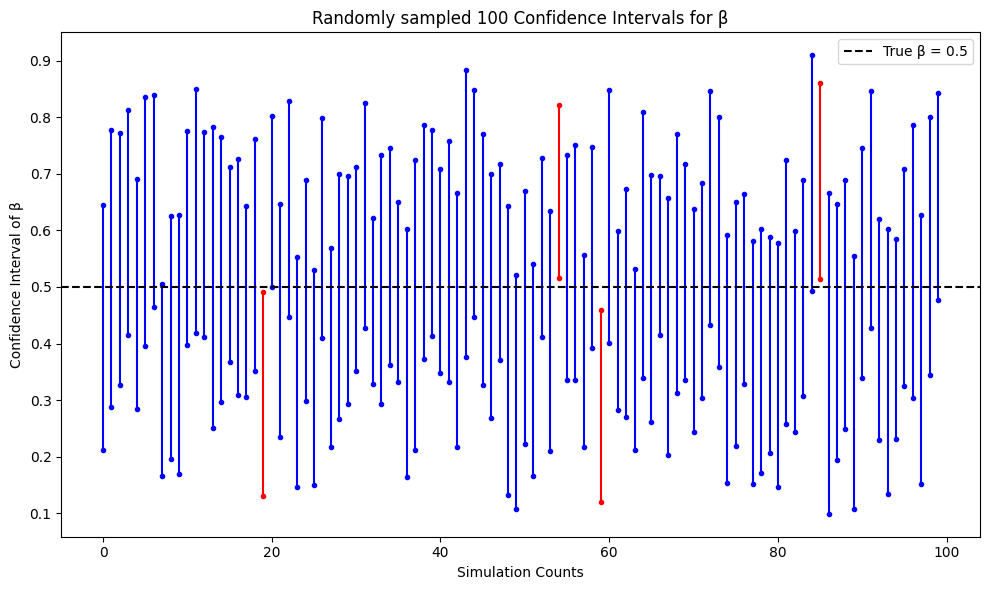

In [7]:
size = 100
random_indices = np.random.randint(low=0, high=J, size=size)

plt.figure(figsize=(10, 6))
# Plot the positive confidence interval in blue
for i, j in enumerate(random_indices):
    if result[j]:
        plt.plot([i, i], CIs[j], color='blue', marker='o', markersize=3)

# Plot the negative confidence interval in red
for i, j in enumerate(random_indices):
    if not result[j]:
        plt.plot([i, i], CIs[j], color='red', marker='o', markersize=3)

# Plot the true beta value
plt.axhline(y=beta, color='black', linestyle='--', label=f'True β = {beta}')

plt.xlabel('Simulation Counts')
plt.ylabel('Confidence Interval of β')
plt.title(f'Randomly sampled {size} Confidence Intervals for β')
plt.legend()
plt.tight_layout()
plt.show()
